In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df_raw = pd.read_csv("직무능력평가.csv", engine = "python", encoding ="949")

In [3]:
df_raw.describe()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,64.633333,66.600000,53.133333,56.366667,64.633333,74.766667,42.933333
std,12.172562,13.314757,12.235430,11.737013,10.397226,9.894908,10.288706
min,40.000000,37.000000,30.000000,34.000000,43.000000,49.000000,25.000000
25%,58.750000,58.500000,45.000000,47.000000,58.250000,69.250000,35.000000
50%,65.500000,65.000000,51.500000,56.500000,63.500000,77.500000,41.000000
75%,71.750000,77.000000,62.500000,66.750000,71.000000,80.000000,47.750000
max,85.000000,90.000000,83.000000,75.000000,88.000000,92.000000,72.000000


# 이건 30개짜리 데이터 ~ 나중에 K 결정할 때, 이 데이터의 구조를 제대로 이해해야 한다. 군집 개수 지정시, 15개면 많을 수 있다.(나무 그릴 때, leaf와 유사)

In [4]:
matplotlib.rc('font', family = "NanumGothic")

In [5]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

# 설명변수만 남기는 방법 3가지

## 첫번째

In [6]:
# df_raw_x = df_raw.drop("EVAL", axis=1)
# df_raw_y = df_raw["EVAL"]
# df_raw_x.head()

## 두번째

In [7]:
df_raw_y =df_raw_scaled[:0]
df_raw_x =df_raw_scaled[:,1:]
df_raw_x[0:5]  # [0:5] : 이게 ndarray에서 head()와 같은 기능

array([[-1.19166169, -1.92300586, -1.50494461, -0.35542617,  1.77141034,
         0.20430138],
       [-0.19861028, -0.17733772, -0.20508842, -0.15977874, -0.18159526,
         0.4020124 ],
       [ 0.25972114,  1.23582221,  1.09476777,  1.11192959,  1.15467173,
         0.50086791],
       [-0.27499885, -0.67610004, -0.81168798, -1.0401922 ,  0.9490922 ,
        -0.78425369],
       [ 0.87082969,  0.23829756,  0.83479653,  0.622811  ,  0.84630243,
         0.4020124 ]])

## 세번째

In [8]:
x_cols =df_raw.columns[1:]

df_raw_x_ = pd.DataFrame(df_raw_x, columns = x_cols )
df_raw_x_.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012


# 3. Dendrogram

In [9]:
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")
Z_minkowski = linkage(df_raw_x, method ="average", metric = "minkowski")

Text(0, 0.5, 'sample index')

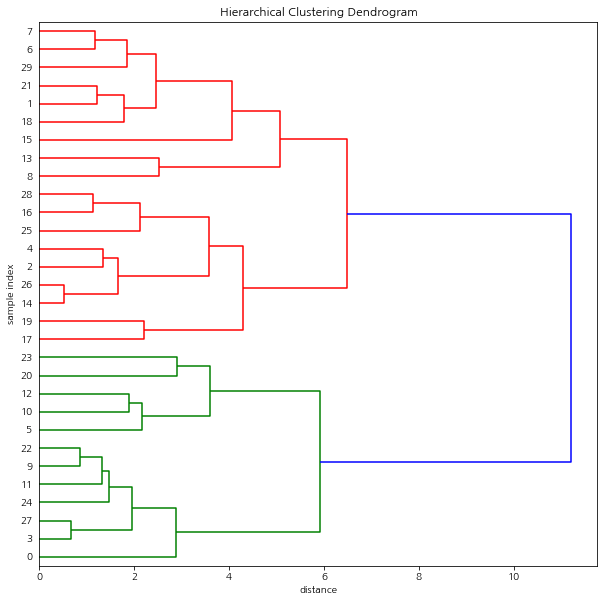

In [10]:
#연결 : 와드(ward) / 거리 계산 : 유클리디안

plt.figure(figsize=(10,10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size =10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

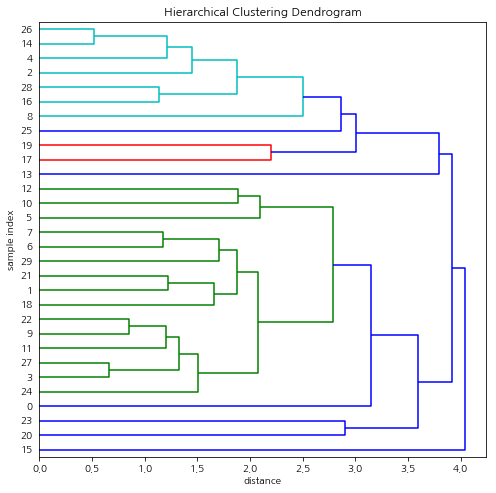

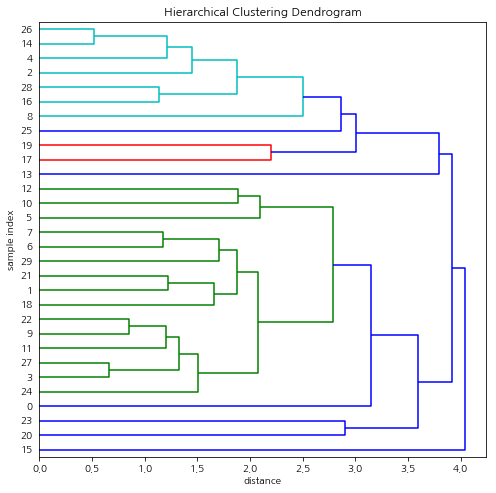

In [11]:
#연결 : average/ 거리 계산 : 유클리디안

plt.figure(figsize=(8,8))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size =10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")


#연결 : average/ 거리 계산 : 민콥스키

plt.figure(figsize=(8,8))
ax = plt.subplot(111)

dendrogram(Z_minkowski, leaf_font_size =10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

# 3. 계층형 군집 생성

In [12]:
cluster_hierarchical = fcluster(Z = Z_ward, t=5, criterion = "distance")

df_raw["ClusterHierarchical"] = cluster_hierarchical

df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


## 산점도 행렬 그려서 K에 대한 특성 확인해보기

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


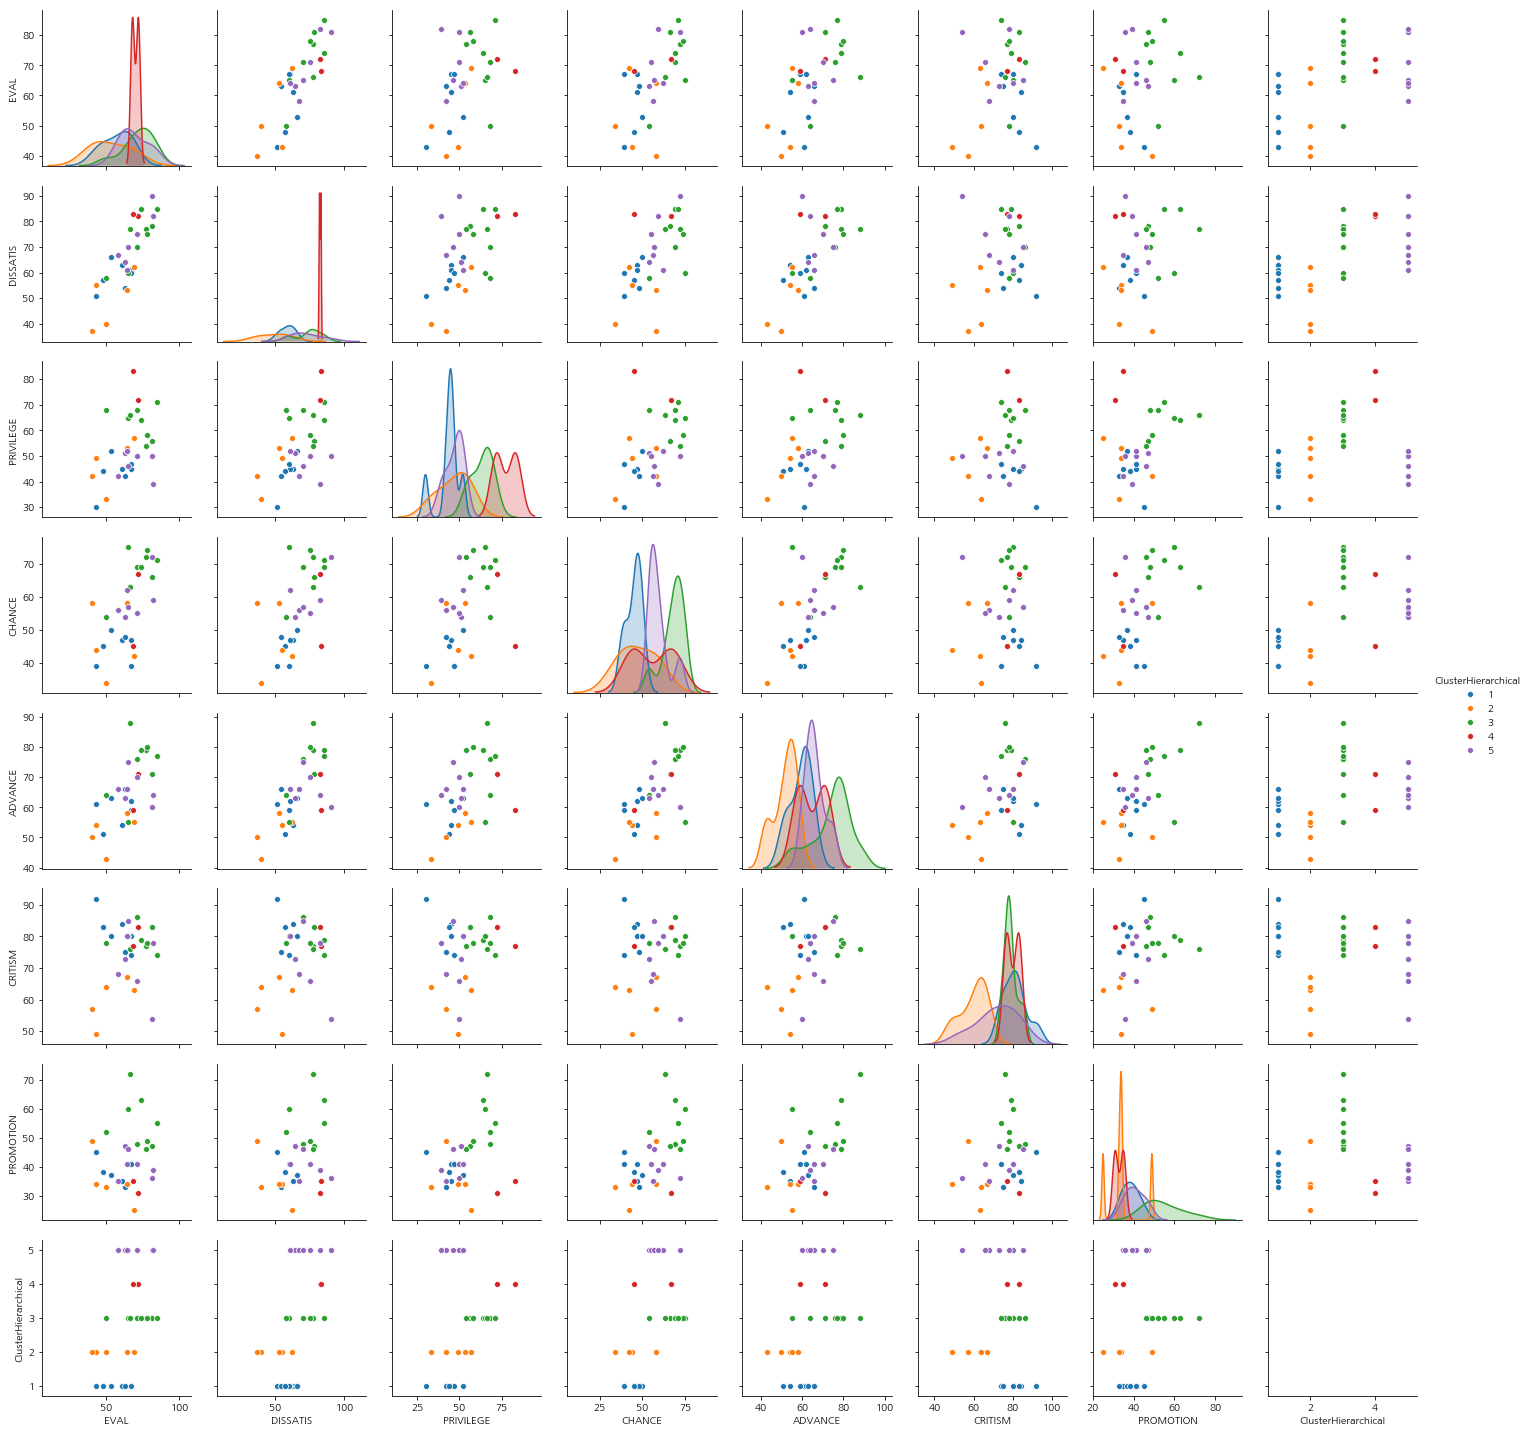

In [13]:
import seaborn as sns

sns.pairplot(df_raw, hue="ClusterHierarchical")

In [14]:
# df_raw = pd.DataFrame(df_raw)
# df_raw

In [15]:
# num = df_raw['ClusterHierarchical'].unique()
# for number in num:
#     plt.plot(df_raw[df_raw['ClusterHierarchical'] = number]['DISSATIS'], y=df_raw[df_raw['ClusterHierarchical'] == number]['EVAL'],linestyle = '-', label = 'ClusterHierarchical'+str(number))


([array([1., 0., 0., 1., 3., 1., 1., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 3., 3., 1., 0., 0.]),
  array([1., 0., 0., 0., 0., 1., 0., 4., 1., 1.]),
  array([1., 0., 0., 1., 1., 2., 2., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 1., 1., 2., 2., 1.]),
  array([1., 0., 0., 1., 2., 4., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 1., 0., 2., 3., 0., 0.]),
  array([1., 0., 0., 0., 1., 2., 0., 3., 1., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 4., 1., 1.]),
  array([1., 0., 0., 0., 2., 1., 2., 1., 1., 0.]),
  array([1., 0., 0., 1., 0., 2., 3., 1., 0., 0.]),
  array([1., 0., 0., 0., 2., 1., 2., 1., 1., 0.]),
  array([1., 0., 1., 0., 1., 1., 3., 1., 0., 0.]),
  array([1., 0., 0., 1., 1., 0., 1., 1., 1., 2.]),
  array([1., 0., 0., 0., 1., 1., 0., 1., 4., 0.]),
  array([1., 0., 0., 1., 0., 2., 1., 1., 1., 1.]),
  array([1., 0., 0., 0., 0., 0., 2., 1., 3., 1.]),
  array([1., 0., 0., 0., 0., 1., 2., 2., 2., 0.]),
  array([1., 0., 0., 0., 2., 0., 1., 2., 1., 1.]),
  array([1., 0., 0., 0., 0., 3.

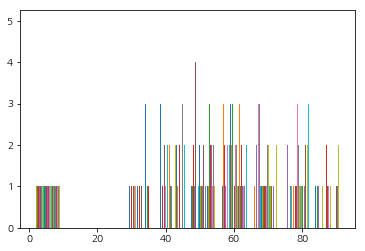

In [16]:
plt.hist(df_raw)

# 3. 군집별 데이터 요약[프로파일 파악]

In [17]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["count", "min", "mean", "max"])

level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_count,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_count,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_count,...,ADVANCE_mean,ADVANCE_max,CRITISM_count,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_count,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,7,43,57.429,67,7,51,58.857,66,7,...,59.429,66,7,74,81.143,92,7,33,38.571,45
1,2,5,40,53.200,69,5,37,49.400,62,5,...,52.000,58,5,49,60.000,67,5,25,35.000,49
2,3,9,50,71.889,85,9,58,73.889,85,9,...,74.333,88,9,74,79.000,86,9,46,54.667,72
3,4,2,68,70.000,72,2,82,82.500,83,2,...,65.000,71,2,77,80.000,83,2,31,33.000,35
4,5,7,58,69.143,82,7,61,72.714,90,7,...,66.286,75,7,54,72.000,85,7,35,40.714,47


## count 추가해 찍어본 해석 : 4번 군집은 2개 밖에 없다. 이상한 놈일 확률 높다.

# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 4. K-평균 군집분석

## n_iter_cluster, 군집 개수를 15개로 줬다. 이게 적절한가? 
## 분석하는 데이터 수를 보고 판단할 수 있다. 30개짜리 데이터인데 15개 이상이면 너무 크다.

In [24]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)

ds_error = pd.DataFrame({'NumberofCluster':cluster_range, 'Error':clus_error})
ds_error.round(3)

,NumberofCluster,Error
0,1,180.000
1,2,114.083
2,3,93.637
3,4,79.087
4,5,68.507
5,6,55.884
6,7,48.885
7,8,47.741
8,9,37.005
9,10,33.567


Text(0, 0.5, 'Sum of squared distance')

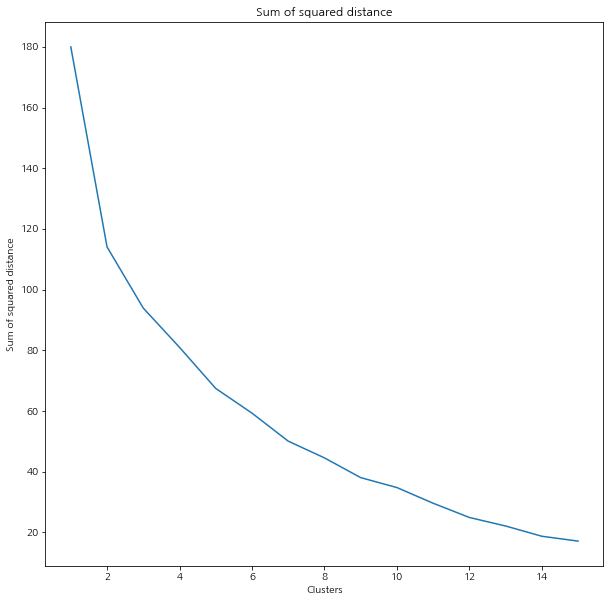

In [28]:
plt.figure(figsize = (10, 10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [29]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw["ClusterKmeans"] = cluster_kmeans

df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,3
2,71,70,68,69,76,86,48,3,1
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,1


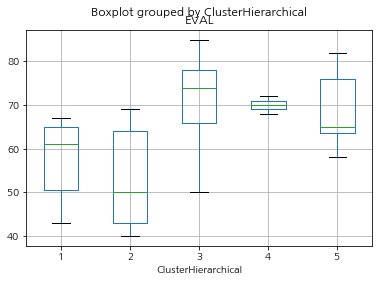

In [30]:
df_raw.boxplot(column="EVAL", by = "ClusterHierarchical", )

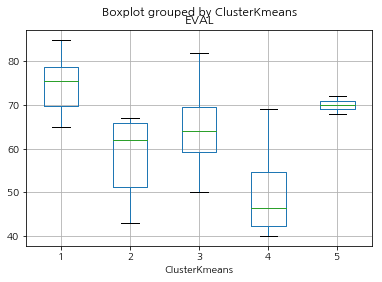

In [31]:
df_raw.boxplot(column="EVAL", by = "ClusterKmeans" )

# y를 쳐다보지 않고, x끼리 해석한 다음 y를 바라봐도 괜찮겠다!

## 우리가 공부한 건 비지도 학습이라 y를 안쳐다봤는데, 이제 y를 한 번 쳐다보자는 것. y에 의해 좌지우지하는 것을 제외시키고 다시 얘네끼리 묶일 수 있는지 찾아보자

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4071e35828>,
      dtype=object)

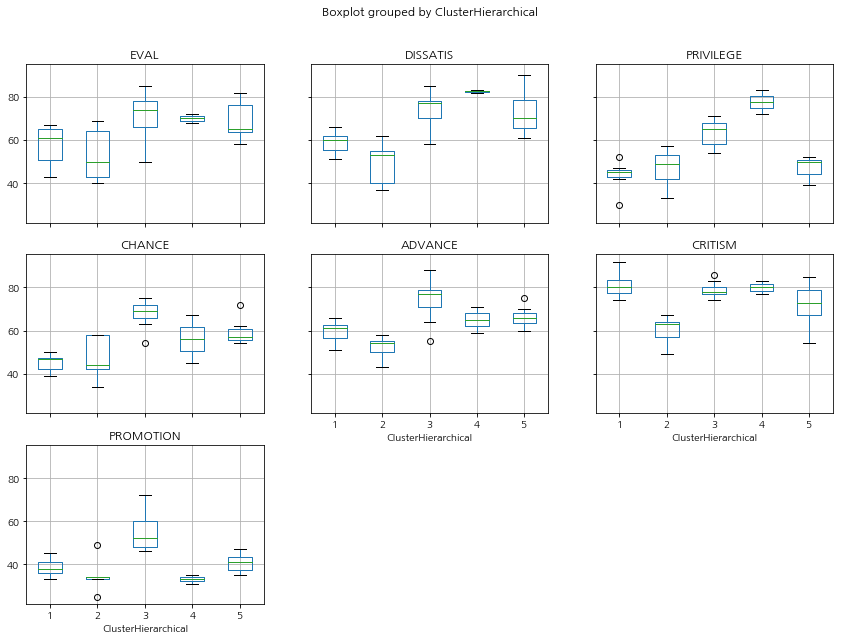

In [32]:
df_raw.boxplot(column = ["EVAL", "DISSATIS", "PRIVILEGE", "CHANCE", "ADVANCE", "CRITISM" ,"PROMOTION"], by = "ClusterHierarchical", figsize=(14,10))

# 5. DBSCAN 군집분석

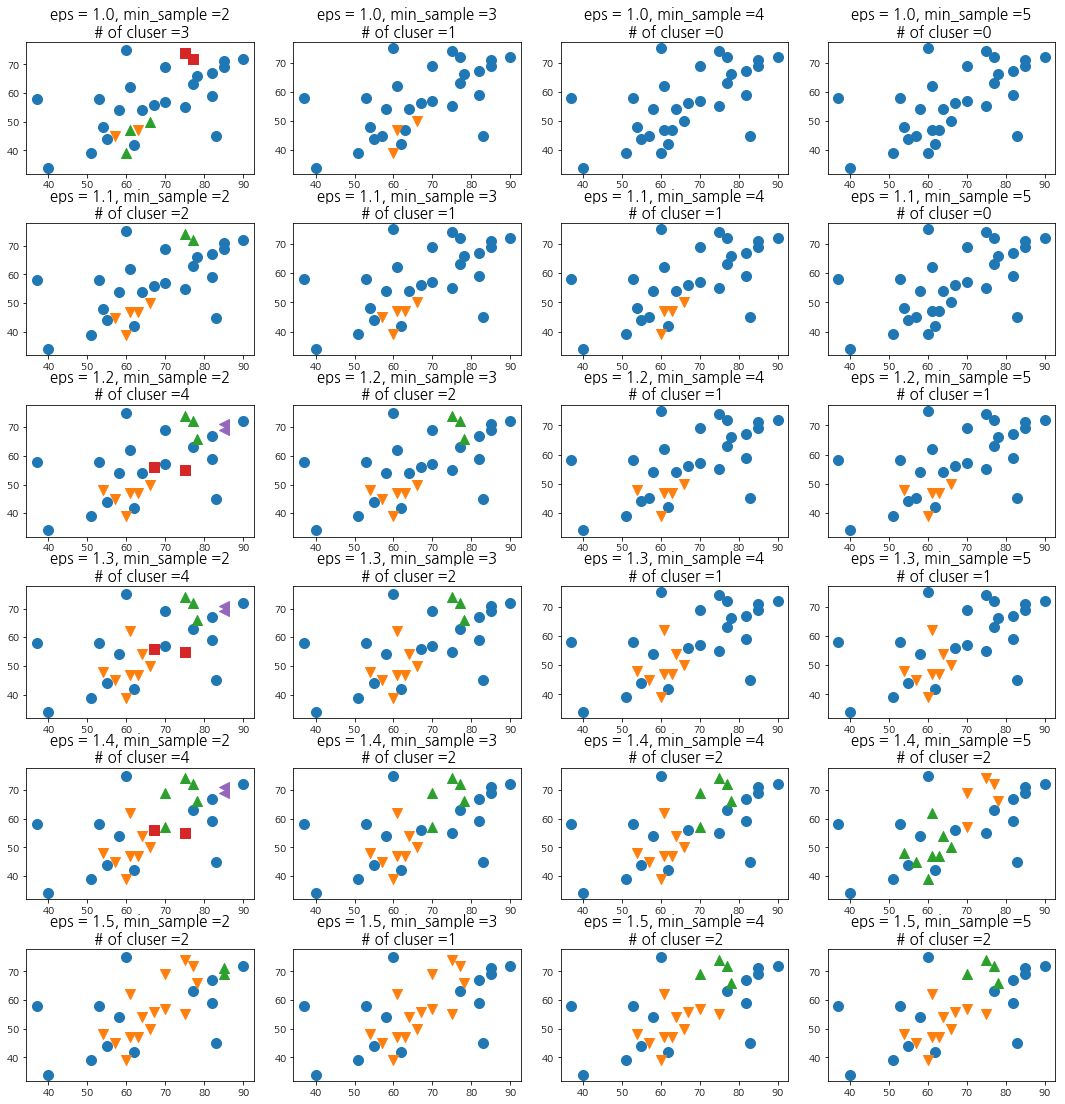

In [34]:
X = df_raw['DISSATIS']
Y = df_raw['CHANCE']

markers = ['o','v','^','s','<','>','p','D']
para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps),len(para_min_sample), figsize = (15,15))
fig.tight_layout(w_pad=1,h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        clusters = dbscan.fit_predict(df_raw_x)
        clusters = clusters + 1
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s=100)
            axes[i,j].set_title('eps = ' + str(eps) + ', min_sample =' + str(min_sample) + \
                                '\n # of cluser =' + str(max(clusters)),fontsize=15)

# [보는 법] 열값(eps)은 고정시키고 행방향으로 한번 보고, 행값(min sample)은 고정시키고 열방향으로 한번 보기